# Final DSEI210 S2020 Programming Part

Complete the notebook problems on the linux machines. Submit the your completed ipython notebook.


# Problem 1: Data Cleaning and Feature Selection for classification
The file is here http://bit.ly/2Cxfbe4 and the description is here http://bit.ly/2YdraGQ

The goal is to classify the bands/no-bands class

You first need to is to clean up the data for classification. The last is the target. Get rid of rows that have bad values.

Standardize the numeric files
One hot encode nominal values (hint use pandas.getdummies)
Perform feature selection with sklearn.feature_selection.RFE to find 5 top features
Perform featuer selection with random forest importance to find 5 top featuers
Use PCA to find 5 top eigenspaces
Run KNN and Logistic Regression on each set of 5 selected features (separately) and the PCA
Create feature extraction for accuracy and classification report.
Who wins?

In [1]:
import pandas as pd

data = pd.read_csv('bands.csv')
data = data.dropna()
data.reset_index(drop=True, inplace=True)

target = (data['band_type'] == 'band').astype(int)
data_cat = pd.get_dummies(data['cylinder_size'])
data_num = data.drop(['Unnamed: 0', 'cylinder_size','band_type'], axis=1)

In [2]:
from sklearn import preprocessing

x = data_num.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_num_normalized = pd.DataFrame(x_scaled, columns = data_num.columns)

normalized_data = pd.concat([data_num_normalized, data_cat], axis=1)
normalized_data.head()

,plating_tank,viscosity,caliper,ink_temperature,humifity,roughness,press_speed,wax,hardener,current_density,anode_space_ratio,chrome_content,CATALOG,SPIEGEL,TABLOID,catalog,spiegel,tabloid
0,1.0,0.297297,0.1675,0.400,0.437500,0.529412,0.653846,0.806452,0.333333,0.666667,0.627570,1.0,0,0,1,0,0,0
1,0.0,0.135135,0.4175,0.320,0.375000,0.117647,0.564231,0.806452,0.433333,0.666667,0.716189,1.0,1,0,0,0,0,0
2,0.0,0.297297,0.4175,0.400,0.479167,0.529412,0.807692,0.741935,0.200000,0.666667,0.675934,1.0,0,0,1,0,0,0
3,0.0,0.135135,0.3350,0.384,0.395833,0.235294,0.564231,0.806452,0.266667,0.666667,0.594845,1.0,1,0,0,0,0,0
4,1.0,0.297297,0.4175,0.360,0.375000,0.529412,1.000000,0.806452,0.200000,0.666667,0.675934,1.0,0,0,1,0,0,0


In [3]:
features = normalized_data.columns
X = normalized_data.values
y = target.values

In [4]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True])

In [5]:
features_by_RFE = features[-5:]

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
pd.DataFrame([clf.feature_importances_], columns=features).transpose().sort_values(0)

,0
plating_tank,0.001998
SPIEGEL,0.003773
spiegel,0.005114
TABLOID,0.007407
CATALOG,0.016066
caliper,0.016303
roughness,0.024337
tabloid,0.042934
wax,0.045027
viscosity,0.055431


In [7]:
features_by_randomforest = ['ink_temperature','wax','hardener', 'current_density','press_speed']

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X)
X_pca = pca.transform(X)
pca.components_

array([[-1.32533404e-01,  4.20598174e-02,  3.71154237e-03,
        -1.64540441e-02,  8.34809557e-03, -2.73960804e-02,
        -9.87049786e-02,  8.53459209e-02,  8.21130277e-03,
        -3.50940755e-02, -7.63445764e-03,  1.14172291e-02,
         6.46353222e-01,  6.39818196e-02, -7.34141297e-01,
         1.16524564e-02,  4.12475868e-03,  8.02904027e-03],
       [ 9.81964706e-01, -3.18490056e-02, -4.56768685e-03,
        -9.34598678e-03, -4.17819619e-02, -6.76590695e-03,
        -3.96492409e-02, -3.26779887e-02, -1.72860528e-03,
         8.11885815e-02,  2.77460119e-02, -2.70401920e-02,
         7.85570216e-02, -2.12092226e-02, -1.14078119e-01,
         4.89178345e-02,  8.23111264e-03, -4.18627410e-04],
       [ 1.04674993e-02,  2.38780064e-02, -1.14662283e-02,
        -3.51384705e-03,  3.94824582e-02, -5.05852818e-02,
         8.03282960e-02,  1.63742593e-02,  2.83160164e-02,
         9.18822801e-03, -1.90260178e-02, -1.05519258e-01,
        -5.04934358e-01,  7.50886375e-01, -3.85933428e

In [9]:
### Running KNN and Logestic

In [10]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


print('Logestic:')

X_rfe_features = normalized_data[features_by_RFE].values
logestic_rfe = LogisticRegression(random_state=0).fit(X_rfe_features, y)
print('RFE:',logestic_rfe.score(X_rfe_features, y))

X_rf_features = normalized_data[features_by_randomforest].values
logestic_rf = LogisticRegression(random_state=0).fit(X_rf_features, y)
print( 'RF: ',logestic_rf.score(X_rf_features, y))

logestic_pca = LogisticRegression(random_state=0).fit(X_pca, y)
print( 'PCA:', logestic_pca.score(X_pca, y))


Logestic:
RFE: 0.6387665198237885
RF:  0.579295154185022
PCA: 0.6365638766519823


In [11]:
from sklearn.neighbors import KNeighborsClassifier
print('KNN:')
knn_rfe_features = KNeighborsClassifier(n_neighbors=2).fit(X_rfe_features, y)
print('RFE:', knn_rfe_features.score(X_rfe_features, y))

knn_rf = KNeighborsClassifier(n_neighbors=2).fit(X_rfe_features, y)
print('RF: ', knn_rf.score(X_rf_features, y))

knn_pca = KNeighborsClassifier(n_neighbors=2).fit(X_pca, y)
print( 'PCA:',knn_pca.score(X_pca, y))

KNN:
RFE: 0.6277533039647577
RF:  0.43171806167400884
PCA: 0.8348017621145375


## Problem 2: Clustering evaluation

We will be working with this file of wheat seed data: http://bit.ly/seed-data

The data is a text file. You will need to parse the file. The first 7 columns are attributes. The last column is a classifier for a wheat type. The goal here is not to do classification but to see how well different clustering algorithms do on this data. 

1. As usual you need to seperate the data into training and testing, and then you will use cross validation on the training data so you have validation data and real training data.

2. Set up PCA to 2d and project while coloring the dots by true class.

3. You will use 3 clustering methods. You will try K means, DBScan and Mean shift. The metric  sklearn.metrics.silhouette_score does not requre knowing the labels. Use this score to optimize one hyperparameter for each method.

4. Using the same PCA as above show the clustering results by three colors for comparison in a three figure scatterplot.

5. Uptill now, except for the coloring, you should **not** have been using the labels in any way. Now evaluate using the test data how well the clustering did by appling the metrics.adjusted_rand_score. Make a bar graph of the performance of the three clustering algoritms.

In [12]:
seeddata = pd.read_csv('seed_data.csv', header=None)
seeddata = seeddata.drop([0], axis=1)
seeddata

,1,2,3,4,5,6,7,8
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [13]:
target_names = set(seeddata[7].values)

In [14]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(seeddata, test_size=0.2, random_state=42)
X_train = train.iloc[:,:-1]
y_train = train.iloc[:, -1]

X_test = test.iloc[:,:-1]
y_test = test.iloc[:, -1]

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = seeddata.iloc[:,:-1]
pca.fit(X)
X_pca = pca.transform(X)

pca_data = pd.DataFrame(X_pca, columns=['pc1','pc2'])
pca_data['target'] = seeddata.iloc[:,-1]
pca_data.head()

,pc1,pc2,target
0,0.663448,-1.417321,1
1,0.315667,-2.689229,1
2,-0.660499,-1.131506,1
3,-1.055276,-1.621190,1
4,1.619999,-2.183384,1


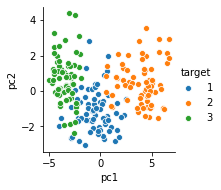

In [16]:
import seaborn as sns
sns.pairplot(x_vars=["pc1"], y_vars=["pc2"], data=pca_data, hue="target")

In [17]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [18]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
dbscan.fit(X_train)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [19]:
from sklearn.cluster import MeanShift
clustering = MeanShift(bandwidth=2).fit(X_train)

In [20]:
from sklearn.metrics import silhouette_score

n_clusters = [2,3,4,5,6]

for n_cluster in n_clusters:
    clusterer = KMeans(n_clusters=n_cluster, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    print(n_cluster, silhouette_avg)

2 0.5139364276541407
3 0.47360551031845716
4 0.41288395033852315
5 0.3676688867167249
6 0.3780329448689182


In [21]:
eps_s = [ 0.5, 0.6, 0.7, 0.8, 0.9]


for eps in eps_s:
    dbscan = DBSCAN(eps=eps)
    dbscan_labels = dbscan.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train, dbscan_labels)
    print(eps, silhouette_avg)

0.5 -0.3711226047253379
0.6 -0.010763010175376984
0.7 0.12638909360143713
0.8 0.2641436153270427
0.9 0.30461790718602916


In [22]:
max_iters = [10, 20, 30, 40, 50]

for max_iter in max_iters:
    meanshift = MeanShift(max_iter=max_iter)
    meanshift_labels = meanshift.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train, meanshift_labels)
    print(max_iter, silhouette_avg)

10 0.5129314002191017
20 0.5156315517359892
30 0.5139544793664844
40 0.5139544793664844
50 0.5139544793664844


In [23]:
from sklearn.metrics import adjusted_rand_score
meanshift = MeanShift(max_iter=30)
meanshift_labels = meanshift.fit_predict(X_train)

dbscan = DBSCAN(eps=0.9)
dbscan_labels = dbscan.fit_predict(X_train)
    
clusterer = KMeans(n_clusters=2, random_state=10)
cluster_labels = clusterer.fit_predict(X_train)
    

print( 'meanshift', adjusted_rand_score(meanshift_labels, y_train.values))
print( 'dbscan   ', adjusted_rand_score(dbscan_labels, y_train.values))
print( 'kmean    ', adjusted_rand_score(cluster_labels, y_train.values))

meanshift 0.4884353678140374
dbscan    0.31371662380259663
kmean     0.46849381954387065


In [24]:
X = seeddata.iloc[:,:-1]

meanshift_labels = meanshift.fit_predict(X)
dbscan_labels = dbscan.fit_predict(X)
cluster_labels = clusterer.predict(X)


pca_data['meanshift'] = meanshift_labels
pca_data['dbscan'] = dbscan_labels
pca_data['kmean'] = cluster_labels

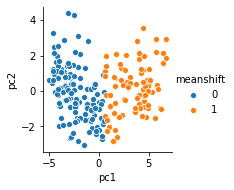

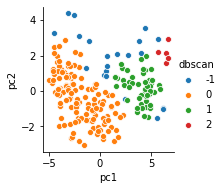

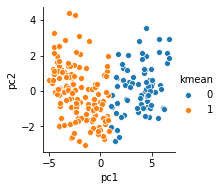

In [25]:
sns.pairplot(x_vars=["pc1"], y_vars=["pc2"], data=pca_data, hue="meanshift")
sns.pairplot(x_vars=["pc1"], y_vars=["pc2"], data=pca_data, hue="dbscan")
sns.pairplot(x_vars=["pc1"], y_vars=["pc2"], data=pca_data, hue="kmean")

## Problem 3: Ensemble Learning

Apply the Bagging meta-estimator of SKLEARN to an logistic regression classification, and compare with random forest, and unbagged logistic regression on the sklearn land cover fetch_covtype data set. Compare with and without balancing the classes. Make a classification report. What is the worst class for each classifer.